### Importing necessary libraries

In [1]:
import warnings 

warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import PIL.Image as Image
import os
import pathlib
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

### No. of cat images for training

In [3]:
len(os.listdir('/kaggle/input/cat-and-dog/training_set/training_set/cats'))

4001

### No. of dog images for training

In [4]:
len(os.listdir('/kaggle/input/cat-and-dog/training_set/training_set/dogs'))

4006

### No. of cat images for testing

In [5]:
len(os.listdir('/kaggle/input/cat-and-dog/test_set/test_set/cats'))

1012

### No. of dog images for testing

In [6]:
len(os.listdir('/kaggle/input/cat-and-dog/test_set/test_set/dogs'))

1013

### Image Size

In [7]:
image_shape = (200,200)

### Loading all the images

In [8]:
X_train, X_test, y_train, y_test = [], [], [], []

for image in os.listdir('/kaggle/input/cat-and-dog/training_set/training_set/cats/'):
    img = cv2.imread(str('/kaggle/input/cat-and-dog/training_set/training_set/cats/'+str(image)))
    if img is None:
        print(f"Failed to read image in training_set/cats: {image}")
    else:
        resized_img = cv2.resize(img, image_shape)
        X_train.append(resized_img)
        y_train.append(0)
        
for image in os.listdir('/kaggle/input/cat-and-dog/training_set/training_set/dogs/'):
    img = cv2.imread(str('/kaggle/input/cat-and-dog/training_set/training_set/dogs/'+str(image)))
    if img is None:
        print(f"Failed to read image training_set/dogs: {image}")
    else:
        resized_img = cv2.resize(img, image_shape)
        X_train.append(resized_img)
        y_train.append(1)
        
for image in os.listdir('/kaggle/input/cat-and-dog/test_set/test_set/cats/'):
    img = cv2.imread(str('/kaggle/input/cat-and-dog/test_set/test_set/cats/'+str(image)))
    if img is None:
        print(f"Failed to read image test_set/cats: {image}")
    else:
        resized_img = cv2.resize(img, image_shape)
        X_test.append(resized_img)
        y_test.append(0)
        
for image in os.listdir('/kaggle/input/cat-and-dog/test_set/test_set/dogs/'):
    img = cv2.imread(str('/kaggle/input/cat-and-dog/test_set/test_set/dogs/'+str(image)))
    if img is None:
        print(f"Failed to read image test_set/dogs: {image}")
    else:
        resized_img = cv2.resize(img, image_shape)
        X_test.append(resized_img)
        y_test.append(1)

Failed to read image in training_set/cats: _DS_Store
Failed to read image training_set/dogs: _DS_Store
Failed to read image test_set/cats: _DS_Store
Failed to read image test_set/dogs: _DS_Store


For cats we have 0 and for dogs we have 1

In [9]:
len(X_train), len(y_train), len(X_test), len(y_test)

(8005, 8005, 2023, 2023)

### List to array

In [10]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

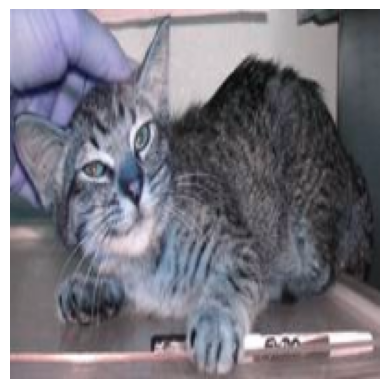

In [11]:
plt.axis("off")
plt.imshow(X_train[256])

### Normalization

In [12]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

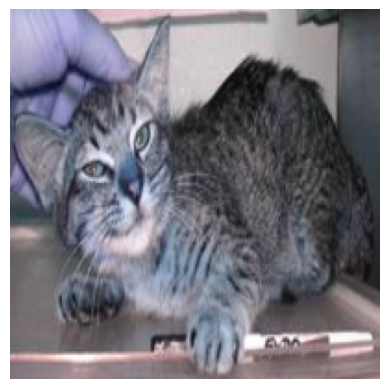

In [13]:
plt.axis("off")
plt.imshow(X_train_scaled[256])

### Training our model

In [14]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(200,200,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
             
model.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
251/251 [==============================] - 20s 40ms/step - loss: 0.6621 - accuracy: 0.6016
Epoch 2/20
251/251 [==============================] - 10s 39ms/step - loss: 0.5632 - accuracy: 0.7062
Epoch 3/20
251/251 [==============================] - 10s 38ms/step - loss: 0.4923 - accuracy: 0.7669
Epoch 4/20
251/251 [==============================] - 10s 39ms/step - loss: 0.4268 - accuracy: 0.8075
Epoch 5/20
251/251 [==============================] - 10s 39ms/step - loss: 0.3675 - accuracy: 0.8394
Epoch 6/20
251/251 [==============================] - 10s 39ms/step - loss: 0.3021 - accuracy: 0.8697
Epoch 7/20
251/251 [==============================] - 10s 39ms/step - loss: 0.2413 - accuracy: 0.8988
Epoch 8/20
251/251 [==============================] - 10s 40ms/step - loss: 0.1754 - accuracy: 0.9330
Epoch 9/20
251/251 [==============================] - 10s 40ms/step - loss: 0.1217 - accuracy: 0.9528
Epoch 10/20
251/251 [==============================] - 10s 40ms/step - loss: 0.074

### Prediction for X_test_scaled

In [15]:
y_pred = model.predict(X_test_scaled)

64/64 [==============================] - 1s 18ms/step


In [41]:
y_predicted = []

for i in range(0,len(y_pred)):
    if y_pred[i][0] >=0.5:
        y_predicted.append(1)
    else:
        y_predicted.append(0)

In [43]:
y_predicted[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [44]:
y_test[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Confusion Matrix

<Axes: >

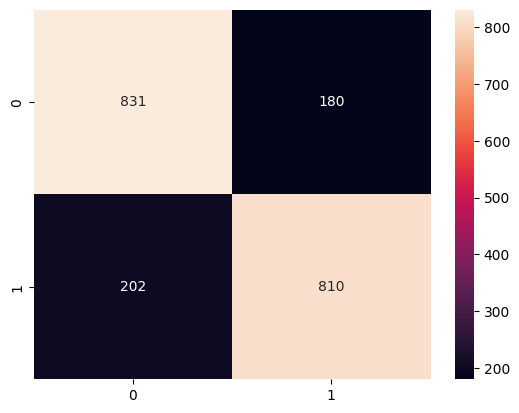

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

### Classification Report

In [48]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1011
           1       0.82      0.80      0.81      1012

    accuracy                           0.81      2023
   macro avg       0.81      0.81      0.81      2023
weighted avg       0.81      0.81      0.81      2023



### Making changes in model

In [49]:
model1 = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(200,200,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation='sigmoid'),
])

model1.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
             
model1.fit(X_train_scaled, y_train, epochs=15)

Epoch 1/15
251/251 [==============================] - 13s 43ms/step - loss: 0.6868 - accuracy: 0.5453
Epoch 2/15
251/251 [==============================] - 11s 42ms/step - loss: 0.6357 - accuracy: 0.6290
Epoch 3/15
251/251 [==============================] - 11s 42ms/step - loss: 0.5621 - accuracy: 0.7104
Epoch 4/15
251/251 [==============================] - 11s 42ms/step - loss: 0.5017 - accuracy: 0.7512
Epoch 5/15
251/251 [==============================] - 10s 42ms/step - loss: 0.4333 - accuracy: 0.8009
Epoch 6/15
251/251 [==============================] - 11s 42ms/step - loss: 0.3897 - accuracy: 0.8246
Epoch 7/15
251/251 [==============================] - 10s 42ms/step - loss: 0.3268 - accuracy: 0.8586
Epoch 8/15
251/251 [==============================] - 11s 42ms/step - loss: 0.2681 - accuracy: 0.8874
Epoch 9/15
251/251 [==============================] - 11s 42ms/step - loss: 0.2022 - accuracy: 0.9191
Epoch 10/15
251/251 [==============================] - 11s 42ms/step - loss: 0.144

### Prediction for X_test_scaled

In [80]:
y_pred = model1.predict(X_test_scaled)

64/64 [==============================] - 1s 16ms/step


In [103]:
y_predicted = []

for i in range(0,len(y_pred)):
    if y_pred[i][0] >= 0.35:
        y_predicted.append(1)
    else:
        y_predicted.append(0)

### Confusion Matrix

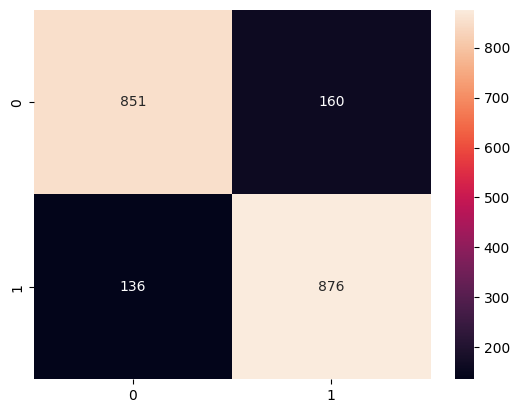

In [104]:
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

### Classification Report

In [105]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1011
           1       0.85      0.87      0.86      1012

    accuracy                           0.85      2023
   macro avg       0.85      0.85      0.85      2023
weighted avg       0.85      0.85      0.85      2023



### Adding one Convolution Layer and Maxpooling Layer

In [90]:
model2 = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(200,200,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(filters=1024, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation='sigmoid'),
])

model2.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
             
model2.fit(X_train_scaled, y_train, epochs=15)

KeyboardInterrupt: 

### Prediction for X_test_scaled

In [62]:
y_pred = model2.predict(X_test_scaled)

64/64 [==============================] - 1s 18ms/step


In [63]:
for i in range(0,len(y_pred)):
    if y_pred[i][0] >=0.5:
        y_pred[i][0] = 1
    else:
        y_pred[i][0] = 0

### Confusion Matrix

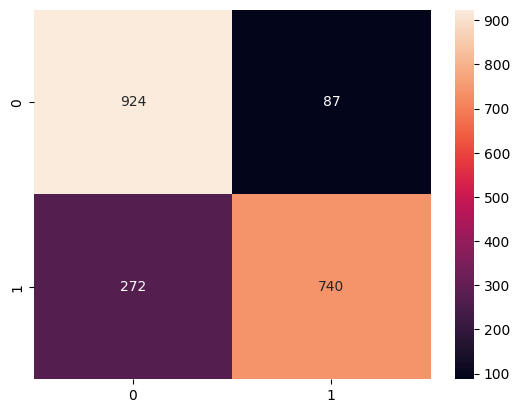

In [64]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

### Classification Report

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84      1011
           1       0.89      0.73      0.80      1012

    accuracy                           0.82      2023
   macro avg       0.83      0.82      0.82      2023
weighted avg       0.83      0.82      0.82      2023



### Saving best performing model model1

In [106]:
model1.save('model.h5')

### Using Pre-trained model

In [15]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19

### VGG16

In [110]:
vgg16 = VGG16(input_shape=(200,200,3), weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [111]:
for layer in vgg16.layers:
    layer.trainable = False

In [114]:
x = Flatten()(vgg16.output)

In [119]:
prediction = Dense(1, activation='sigmoid')(x)

model3 = Model(inputs=vgg16.input, outputs=prediction)

In [120]:
model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [121]:
model3.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [122]:
model3.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
251/251 [==============================] - 37s 128ms/step - loss: 0.2373 - accuracy: 0.8978
Epoch 2/20
251/251 [==============================] - 30s 118ms/step - loss: 0.1368 - accuracy: 0.9459
Epoch 3/20
251/251 [==============================] - 30s 121ms/step - loss: 0.1007 - accuracy: 0.9613
Epoch 4/20
251/251 [==============================] - 30s 122ms/step - loss: 0.0763 - accuracy: 0.9756
Epoch 5/20
251/251 [==============================] - 30s 121ms/step - loss: 0.0627 - accuracy: 0.9814
Epoch 6/20
251/251 [==============================] - 30s 121ms/step - loss: 0.0520 - accuracy: 0.9860
Epoch 7/20
251/251 [==============================] - 30s 121ms/step - loss: 0.0390 - accuracy: 0.9929
Epoch 8/20
251/251 [==============================] - 30s 121ms/step - loss: 0.0306 - accuracy: 0.9969
Epoch 9/20
251/251 [==============================] - 30s 121ms/step - loss: 0.0307 - accuracy: 0.9956
Epoch 10/20
251/251 [==============================] - 30s 121ms/step - l

### Prediction for X_test_scaled

In [124]:
y_pred = model3.predict(X_test_scaled)

64/64 [==============================] - 9s 136ms/step


In [146]:
y_predicted = []

for i in range(0,len(y_pred)):
    if y_pred[i][0] >=0.40:
        y_predicted.append(1)
    else:
        y_predicted.append(0)

### Confusion Matrix

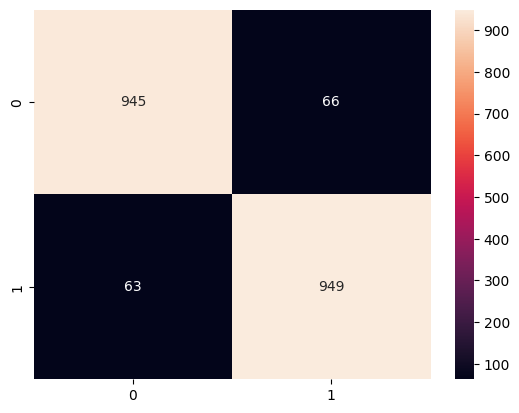

In [147]:
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

### Classification Report

In [148]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1011
           1       0.93      0.94      0.94      1012

    accuracy                           0.94      2023
   macro avg       0.94      0.94      0.94      2023
weighted avg       0.94      0.94      0.94      2023



### Using Early Stopping

In [157]:
model4 = Model(inputs=vgg16.input, outputs=prediction)

model4.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

model4.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/50
201/201 [==============================] - 34s 164ms/step - loss: 0.0060 - accuracy: 0.9997 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 2/50
201/201 [==============================] - 30s 150ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 3/50
201/201 [==============================] - 30s 149ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 4/50
201/201 [==============================] - 30s 152ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 5/50
201/201 [==============================] - 30s 151ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 0.9994
Epoch 6/50
201/201 [==============================] - 30s 151ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0292 - val_accuracy: 0.9931


In [158]:
y_pred = model4.predict(X_test_scaled)

64/64 [==============================] - 8s 120ms/step


In [159]:
y_predicted = []

for i in range(0,len(y_pred)):
    if y_pred[i][0] >=0.50:
        y_predicted.append(1)
    else:
        y_predicted.append(0)

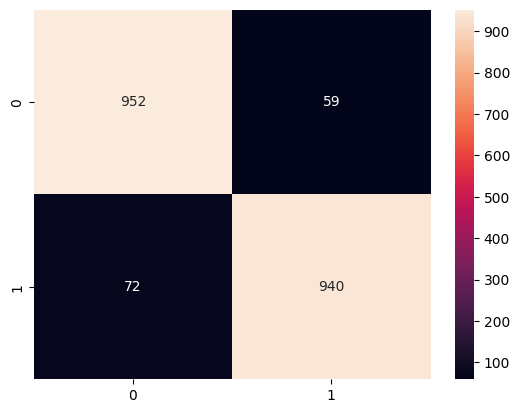

In [160]:
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [161]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1011
           1       0.94      0.93      0.93      1012

    accuracy                           0.94      2023
   macro avg       0.94      0.94      0.94      2023
weighted avg       0.94      0.94      0.94      2023



### VGG19

In [16]:
vgg19 = VGG19(input_shape=(200,200,3), weights='imagenet', include_top=False)

In [17]:
for layer in vgg19.layers:
    layer.trainable = False

In [18]:
x = Flatten()(vgg19.output)

In [19]:
prediction = Dense(1, activation='sigmoid')(x)

model4 = Model(inputs=vgg19.input, outputs=prediction)

In [20]:
model4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [21]:
model4.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

model4.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/50
201/201 [==============================] - 49s 191ms/step - loss: 0.2972 - accuracy: 0.8699 - val_loss: 0.2556 - val_accuracy: 0.8763
Epoch 2/50
201/201 [==============================] - 37s 184ms/step - loss: 0.1808 - accuracy: 0.9277 - val_loss: 0.1405 - val_accuracy: 0.9382
Epoch 3/50
201/201 [==============================] - 36s 177ms/step - loss: 0.1396 - accuracy: 0.9455 - val_loss: 0.2739 - val_accuracy: 0.8613
Epoch 4/50
201/201 [==============================] - 36s 179ms/step - loss: 0.1070 - accuracy: 0.9656 - val_loss: 0.4075 - val_accuracy: 0.8026
Epoch 5/50
201/201 [==============================] - 36s 179ms/step - loss: 0.0893 - accuracy: 0.9719 - val_loss: 0.3216 - val_accuracy: 0.8438
Epoch 6/50
201/201 [==============================] - 36s 178ms/step - loss: 0.0771 - accuracy: 0.9763 - val_loss: 0.3390 - val_accuracy: 0.8426
Epoch 7/50
201/201 [==============================] - 36s 179ms/step - loss: 0.0677 - accuracy: 0.9825 - val_loss: 0.3527 - val_ac

In [22]:
y_pred = model4.predict(X_test_scaled)

64/64 [==============================] - 10s 161ms/step


In [31]:
y_predicted = []

for i in range(0,len(y_pred)):
    if y_pred[i][0] >=0.50:
        y_predicted.append(1)
    else:
        y_predicted.append(0)

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

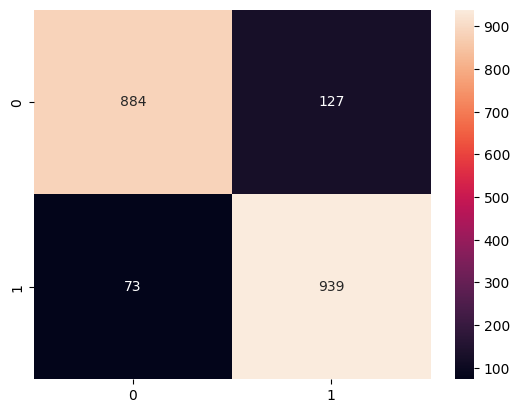

In [33]:
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [34]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90      1011
           1       0.88      0.93      0.90      1012

    accuracy                           0.90      2023
   macro avg       0.90      0.90      0.90      2023
weighted avg       0.90      0.90      0.90      2023

